**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

##**GRUPO 17**

**Balbuena, Florencia**

**Conrrero, Agustina**

**Sanchez Herrera, Carlos**

**Serrantes, Sebastian**

---


En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [35]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

from sqlalchemy import create_engine, text

In [36]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

In [37]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,"1,480,000.00",S,Biggin,3/12/2016,2.50,"3,067.00",...,1.00,1.00,202.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
1,Abbotsford,25 Bloomburg St,2,h,"1,035,000.00",S,Biggin,4/02/2016,2.50,"3,067.00",...,1.00,0.00,156.00,79.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
2,Abbotsford,5 Charles St,3,h,"1,465,000.00",SP,Biggin,4/03/2017,2.50,"3,067.00",...,2.00,0.00,134.00,150.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"


## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



# Desarrollo
# 1.1 Creamos la base de datos SQLite "melbourneData" utilizando la libreria SQLalchemy.

In [38]:
from sqlalchemy import create_engine, text
engine = create_engine('sqlite:///melbourneData.sqlite3', echo=True)

# 1.2 Ingestamos los datos de las propiedades en Melbourne provistos por la encuesta de Kaggle y los guardamos en la tabla "kaggle_survey".

In [39]:
melb_df.to_sql('kaggle_survey', con=engine, if_exists="replace")

2022-10-07 15:51:56,895 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("kaggle_survey")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("kaggle_survey")


2022-10-07 15:51:56,899 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:51:56,905 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("kaggle_survey")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("kaggle_survey")


2022-10-07 15:51:56,907 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:51:56,910 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


2022-10-07 15:51:56,912 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:51:56,915 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("kaggle_survey")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("kaggle_survey")


2022-10-07 15:51:56,917 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:51:56,923 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2022-10-07 15:51:56,926 INFO sqlalchemy.engine.Engine [raw sql] ('kaggle_survey',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('kaggle_survey',)


2022-10-07 15:51:56,929 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("kaggle_survey")


INFO:sqlalchemy.engine.Engine:PRAGMA main.foreign_key_list("kaggle_survey")


2022-10-07 15:51:56,931 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:51:56,933 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("kaggle_survey")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.foreign_key_list("kaggle_survey")


2022-10-07 15:51:56,935 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:51:56,938 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2022-10-07 15:51:56,940 INFO sqlalchemy.engine.Engine [raw sql] ('kaggle_survey',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('kaggle_survey',)


2022-10-07 15:51:56,944 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("kaggle_survey")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("kaggle_survey")


2022-10-07 15:51:56,946 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:51:56,948 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_kaggle_survey_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_kaggle_survey_index")


2022-10-07 15:51:56,950 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:51:56,953 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("kaggle_survey")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("kaggle_survey")


2022-10-07 15:51:56,955 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:51:56,957 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_kaggle_survey_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_kaggle_survey_index")


2022-10-07 15:51:56,959 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:51:56,962 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2022-10-07 15:51:56,964 INFO sqlalchemy.engine.Engine [raw sql] ('kaggle_survey',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('kaggle_survey',)


2022-10-07 15:51:56,969 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-10-07 15:51:56,971 INFO sqlalchemy.engine.Engine 
DROP TABLE kaggle_survey


INFO:sqlalchemy.engine.Engine:
DROP TABLE kaggle_survey


2022-10-07 15:51:56,973 INFO sqlalchemy.engine.Engine [no key 0.00229s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00229s] ()


2022-10-07 15:51:57,015 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-10-07 15:51:57,021 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-10-07 15:51:57,026 INFO sqlalchemy.engine.Engine 
CREATE TABLE kaggle_survey (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE kaggle_survey (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




2022-10-07 15:51:57,028 INFO sqlalchemy.engine.Engine [no key 0.00232s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00232s] ()


2022-10-07 15:51:57,039 INFO sqlalchemy.engine.Engine CREATE INDEX ix_kaggle_survey_index ON kaggle_survey ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_kaggle_survey_index ON kaggle_survey ("index")


2022-10-07 15:51:57,041 INFO sqlalchemy.engine.Engine [no key 0.00202s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00202s] ()


2022-10-07 15:51:57,052 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-10-07 15:51:57,105 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-10-07 15:51:57,451 INFO sqlalchemy.engine.Engine INSERT INTO kaggle_survey ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO kaggle_survey ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2022-10-07 15:51:57,461 INFO sqlalchemy.engine.Engine [generated in 0.30698s] ((0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8

INFO:sqlalchemy.engine.Engine:[generated in 0.30698s] ((0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8072, 144.9941, 'Northern

2022-10-07 15:51:57,544 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


# Ahora guardamos el dataset generado en clase con datos de airbnb y sus precios por código postal en otra.


In [40]:
relevant_cols = ['zipcode', 'price', 'weekly_price', 'monthly_price']
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=relevant_cols)
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')
airbnb_df.to_sql('airbnb_survey', con=engine, if_exists="replace")
with engine.connect() as con:
    rs = con.execute('SELECT * FROM airbnb_survey')
    for row in rs:
        print(row)


2022-10-07 15:52:04,957 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_survey")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("airbnb_survey")


2022-10-07 15:52:04,962 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:52:04,968 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_survey")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("airbnb_survey")


2022-10-07 15:52:04,971 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:52:04,974 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


2022-10-07 15:52:04,977 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:52:04,980 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_survey")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("airbnb_survey")


2022-10-07 15:52:04,982 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:52:04,986 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2022-10-07 15:52:04,989 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb_survey',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('airbnb_survey',)


2022-10-07 15:52:04,992 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("airbnb_survey")


INFO:sqlalchemy.engine.Engine:PRAGMA main.foreign_key_list("airbnb_survey")


2022-10-07 15:52:04,995 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:52:04,998 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("airbnb_survey")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.foreign_key_list("airbnb_survey")


2022-10-07 15:52:05,000 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:52:05,002 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2022-10-07 15:52:05,005 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb_survey',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('airbnb_survey',)


2022-10-07 15:52:05,008 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("airbnb_survey")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("airbnb_survey")


2022-10-07 15:52:05,010 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:52:05,013 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_airbnb_survey_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_airbnb_survey_index")


2022-10-07 15:52:05,015 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:52:05,019 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("airbnb_survey")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("airbnb_survey")


2022-10-07 15:52:05,021 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:52:05,024 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_airbnb_survey_index")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_info("ix_airbnb_survey_index")


2022-10-07 15:52:05,026 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-10-07 15:52:05,029 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'


2022-10-07 15:52:05,031 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb_survey',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('airbnb_survey',)


2022-10-07 15:52:05,035 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-10-07 15:52:05,037 INFO sqlalchemy.engine.Engine 
DROP TABLE airbnb_survey


INFO:sqlalchemy.engine.Engine:
DROP TABLE airbnb_survey


2022-10-07 15:52:05,039 INFO sqlalchemy.engine.Engine [no key 0.00202s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00202s] ()


2022-10-07 15:52:05,078 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-10-07 15:52:05,083 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-10-07 15:52:05,087 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb_survey (
	"index" BIGINT, 
	zipcode FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE airbnb_survey (
	"index" BIGINT, 
	zipcode FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)




2022-10-07 15:52:05,089 INFO sqlalchemy.engine.Engine [no key 0.00268s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00268s] ()


2022-10-07 15:52:05,102 INFO sqlalchemy.engine.Engine CREATE INDEX ix_airbnb_survey_index ON airbnb_survey ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_airbnb_survey_index ON airbnb_survey ("index")


2022-10-07 15:52:05,104 INFO sqlalchemy.engine.Engine [no key 0.00262s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00262s] ()


2022-10-07 15:52:05,115 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-10-07 15:52:05,133 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-10-07 15:52:05,538 INFO sqlalchemy.engine.Engine INSERT INTO airbnb_survey ("index", zipcode, price, weekly_price, monthly_price) VALUES (?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO airbnb_survey ("index", zipcode, price, weekly_price, monthly_price) VALUES (?, ?, ?, ?, ?)


2022-10-07 15:52:05,542 INFO sqlalchemy.engine.Engine [generated in 0.34171s] ((0, 3105.0, 60, None, None), (1, 3057.0, 35, 200.0, 803.0), (2, 3182.0, 159, 1253.0, 4452.0), (3, 3071.0, 50, 250.0, 920.0), (4, 3183.0, 69, 400.0, 1900.0), (5, 3806.0, 98, 540.0, None), (6, 3073.0, 50, 335.0, 1400.0), (7, 3002.0, 100, None, None)  ... displaying 10 of 22895 total bound parameter sets ...  (22893, 3006.0, 130, None, None), (22894, 3053.0, 179, None, None))


INFO:sqlalchemy.engine.Engine:[generated in 0.34171s] ((0, 3105.0, 60, None, None), (1, 3057.0, 35, 200.0, 803.0), (2, 3182.0, 159, 1253.0, 4452.0), (3, 3071.0, 50, 250.0, 920.0), (4, 3183.0, 69, 400.0, 1900.0), (5, 3806.0, 98, 540.0, None), (6, 3073.0, 50, 335.0, 1400.0), (7, 3002.0, 100, None, None)  ... displaying 10 of 22895 total bound parameter sets ...  (22893, 3006.0, 130, None, None), (22894, 3053.0, 179, None, None))


2022-10-07 15:52:05,627 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-10-07 15:52:05,648 INFO sqlalchemy.engine.Engine SELECT * FROM airbnb_survey


INFO:sqlalchemy.engine.Engine:SELECT * FROM airbnb_survey


2022-10-07 15:52:05,657 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


(0, 3105.0, 60, None, None)
(1, 3057.0, 35, 200.0, 803.0)
(2, 3182.0, 159, 1253.0, 4452.0)
(3, 3071.0, 50, 250.0, 920.0)
(4, 3183.0, 69, 400.0, 1900.0)
(5, 3806.0, 98, 540.0, None)
(6, 3073.0, 50, 335.0, 1400.0)
(7, 3002.0, 100, None, None)
(8, 3166.0, 98, 535.0, None)
(9, 3199.0, 60, 413.0, 1540.0)
(10, 3121.0, 98, 800.0, None)
(11, 3182.0, 190, 1743.0, 5572.0)
(12, 3000.0, 228, 1575.0, 5100.0)
(13, 3187.0, 46, 320.0, 1150.0)
(14, 3187.0, 50, 300.0, 1000.0)
(15, 3187.0, 43, 300.0, 1100.0)
(16, 3121.0, 138, 1183.0, 4172.0)
(17, 3101.0, 42, None, None)
(18, 3065.0, 161, None, None)
(19, 3188.0, 300, None, None)
(20, 3071.0, 140, 920.0, 3000.0)
(21, 3068.0, 180, 1000.0, 4000.0)
(22, 3199.0, 60, 343.0, 1260.0)
(23, 3195.0, 68, 385.0, 1500.0)
(24, 3071.0, 60, 200.0, 800.0)
(25, 3065.0, 120, None, None)
(26, 3065.0, 228, 2437.0, 8648.0)
(27, 3000.0, 64, None, None)
(28, 3070.0, 48, 300.0, None)
(29, 3207.0, 96, 665.0, None)
(30, 3205.0, 84, 559.0, None)
(31, 3181.0, 98, 600.0, None)
(32, 31

ERROR:sqlalchemy.pool.impl.NullPool:Exception during reset or similar
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/pool/base.py", line 753, in _finalize_fairy
    fairy._reset(pool)
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/pool/base.py", line 1004, in _reset
    pool._dialect.do_rollback(self)
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/default.py", line 683, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139628089284480 and this is thread id 139627666753280.
ERROR:sqlalchemy.pool.impl.NullPool:Exception closing connection <sqlite3.Connection object at 0x7efd7d6cbb90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/pool/base.py", line 753, in _finalize_fairy
    fairy._reset(pool)
  File "/usr/local/lib/python3.7/dist-packag

Streaming output truncated to the last 5000 lines.
(17895, 3141.0, 69, None, None)
(17896, 3127.0, 50, None, None)
(17897, 3783.0, 174, None, None)
(17898, 3065.0, 136, None, None)
(17899, 3030.0, 40, None, None)
(17900, 3053.0, 40, None, None)
(17901, 3121.0, 100, None, None)
(17902, 3030.0, 421, None, None)
(17903, 3030.0, 248, None, None)
(17904, 3000.0, 159, None, None)
(17905, 3030.0, 278, None, None)
(17906, 3056.0, 46, None, None)
(17907, 3008.0, 695, None, None)
(17908, 3056.0, 109, None, None)
(17909, 3109.0, 65, None, None)
(17910, 3141.0, 120, None, None)
(17911, 3053.0, 79, None, None)
(17912, 3121.0, 89, None, None)
(17913, 3006.0, 300, None, None)
(17914, 3008.0, 84, None, None)
(17915, 3767.0, 599, None, None)
(17916, 3006.0, 170, None, None)
(17917, 3150.0, 239, None, None)
(17918, 3006.0, 152, None, None)
(17919, 3006.0, 57, None, None)
(17920, 3011.0, 15, None, None)
(17921, 3182.0, 144, None, None)
(17922, 3182.0, 47, None, None)
(17923, 3108.0, 75, None, None)
(1792

#1.3. Realizamos las siguientes consultas SQL:
    - query1: cantidad de registros totales por ciudad.
    - query2: cantidad de registros totales por barrio y ciudad.

In [41]:
query1 = "SELECT CouncilArea, COUNT(1) FROM kaggle_survey GROUP BY CouncilArea"
query2 = "SELECT CouncilArea, Suburb, COUNT(1) FROM kaggle_survey GROUP BY CouncilArea, Suburb"

queries = [query1, query2]

with engine.connect() as con:
    for query in queries:
      rs = con.execute(query)
      print(query)
      for row in rs:
          print(row)

      print('\n\n')

2022-10-07 15:52:15,025 INFO sqlalchemy.engine.Engine SELECT CouncilArea, COUNT(1) FROM kaggle_survey GROUP BY CouncilArea


INFO:sqlalchemy.engine.Engine:SELECT CouncilArea, COUNT(1) FROM kaggle_survey GROUP BY CouncilArea


2022-10-07 15:52:15,037 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


SELECT CouncilArea, COUNT(1) FROM kaggle_survey GROUP BY CouncilArea
(None, 1369)
('Banyule', 594)
('Bayside', 489)
('Boroondara', 1160)
('Brimbank', 424)
('Cardinia', 8)
('Casey', 38)
('Darebin', 934)
('Frankston', 53)
('Glen Eira', 848)
('Greater Dandenong', 52)
('Hobsons Bay', 434)
('Hume', 164)
('Kingston', 207)
('Knox', 80)
('Macedon Ranges', 7)
('Manningham', 311)
('Maribyrnong', 692)
('Maroondah', 80)
('Melbourne', 470)
('Melton', 66)
('Monash', 333)
('Moonee Valley', 997)
('Moorabool', 1)
('Moreland', 1163)
('Nillumbik', 36)
('Port Phillip', 628)
('Stonnington', 719)
('Unavailable', 1)
('Whitehorse', 304)
('Whittlesea', 167)
('Wyndham', 86)
('Yarra', 647)
('Yarra Ranges', 18)



2022-10-07 15:52:15,137 INFO sqlalchemy.engine.Engine SELECT CouncilArea, Suburb, COUNT(1) FROM kaggle_survey GROUP BY CouncilArea, Suburb


INFO:sqlalchemy.engine.Engine:SELECT CouncilArea, Suburb, COUNT(1) FROM kaggle_survey GROUP BY CouncilArea, Suburb


2022-10-07 15:52:15,143 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


SELECT CouncilArea, Suburb, COUNT(1) FROM kaggle_survey GROUP BY CouncilArea, Suburb
(None, 'Abbotsford', 1)
(None, 'Aberfeldie', 4)
(None, 'Airport West', 6)
(None, 'Albanvale', 2)
(None, 'Albert Park', 5)
(None, 'Albion', 3)
(None, 'Alphington', 2)
(None, 'Altona', 5)
(None, 'Altona Meadows', 2)
(None, 'Altona North', 7)
(None, 'Ardeer', 1)
(None, 'Armadale', 9)
(None, 'Ascot Vale', 5)
(None, 'Ashburton', 7)
(None, 'Ashwood', 1)
(None, 'Aspendale', 3)
(None, 'Aspendale Gardens', 2)
(None, 'Attwood', 1)
(None, 'Avondale Heights', 1)
(None, 'Balaclava', 2)
(None, 'Balwyn', 6)
(None, 'Balwyn North', 20)
(None, 'Bayswater', 2)
(None, 'Bayswater North', 3)
(None, 'Beaumaris', 7)
(None, 'Bellfield', 1)
(None, 'Bentleigh', 8)
(None, 'Bentleigh East', 15)
(None, 'Berwick', 2)
(None, 'Black Rock', 4)
(None, 'Blackburn', 8)
(None, 'Blackburn North', 7)
(None, 'Blackburn South', 4)
(None, 'Bonbeach', 3)
(None, 'Boronia', 2)
(None, 'Box Hill', 5)
(None, 'Braybrook', 2)
(None, 'Briar Hill', 3)
(N

# 1.4 Combinamos ambas tablas ingestadas "kaggle_survey" y "airbnb_survey" para obtener un resultado similar a lo realizado con Pandas en clase.  

In [42]:
query = "SELECT * FROM kaggle_survey LEFT JOIN (SELECT zipcode, AVG(price) AS AIRBNB_AVG_PRICE, AVG(weekly_price) AS AIRBNB_AVG_WEEKLY_PRICE, AVG(monthly_price) AS AIRBNB_AVG_MONTHLY_PRICE FROM airbnb_survey WHERE zipcode IS NOT NULL GROUP BY zipcode) ON kaggle_survey.Postcode = zipcode"
con = engine.connect()
rs = con.execute(query)
print(query)
for row in rs:
  print(row)


2022-10-07 15:52:15,380 INFO sqlalchemy.engine.Engine SELECT * FROM kaggle_survey LEFT JOIN (SELECT zipcode, AVG(price) AS AIRBNB_AVG_PRICE, AVG(weekly_price) AS AIRBNB_AVG_WEEKLY_PRICE, AVG(monthly_price) AS AIRBNB_AVG_MONTHLY_PRICE FROM airbnb_survey WHERE zipcode IS NOT NULL GROUP BY zipcode) ON kaggle_survey.Postcode = zipcode


INFO:sqlalchemy.engine.Engine:SELECT * FROM kaggle_survey LEFT JOIN (SELECT zipcode, AVG(price) AS AIRBNB_AVG_PRICE, AVG(weekly_price) AS AIRBNB_AVG_WEEKLY_PRICE, AVG(monthly_price) AS AIRBNB_AVG_MONTHLY_PRICE FROM airbnb_survey WHERE zipcode IS NOT NULL GROUP BY zipcode) ON kaggle_survey.Postcode = zipcode


2022-10-07 15:52:15,394 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


Streaming output truncated to the last 5000 lines.
(8580, 'Balwyn', '27A Yerrin St', 3, 't', 1680000.0, 'S', 'Fletchers', '22/04/2017', 9.7, 3103.0, 3.0, 3.0, 1.0, 329.0, 178.0, 2005.0, 'Boroondara', -37.8101, 145.0844, 'Southern Metropolitan', 5682.0, 3103.0, 105.26315789473684, 606.75, 2111.25)
(8581, 'Brooklyn', '6 Millers Rd', 2, 'h', 1005000.0, 'S', 'hockingstuart', '22/04/2017', 10.9, 3012.0, 2.0, 1.0, 2.0, 780.0, 156.0, 1950.0, 'Hobsons Bay', -37.8241, 144.8419, 'Western Metropolitan', 962.0, 3012.0, 112.63157894736842, 518.0, 2335.0)
(8582, 'Carlton', '1/2 Drummond St', 3, 'u', 1520000.0, 'S', 'hockingstuart', '8/04/2017', 1.8, 3053.0, 3.0, 2.0, 2.0, 214.0, None, 1993.0, 'Melbourne', -37.8177, 144.8496, 'Northern Metropolitan', 6786.0, 3053.0, 111.76765799256506, 923.5102040816327, 3205.315789473684)
(8583, 'Carlton', '2/100 Keppel St', 2, 't', 960000.0, 'VB', 'Nelson', '20/05/2017', 1.8, 3053.0, 2.0, 2.0, 1.0, 0.0, 90.0, 1860.0, 'Melbourne', -37.7947, 144.9724, 'Northern Metro

## Ejercicio 2 - Pandas: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

# Desarrollo:
#1.1 Seleccionamos un subconjunto de columnas relevantes
##Primero vamos a analizar los datos faltantes de las diferentes variables.

In [43]:
import missingno as msno

melb_df_full = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


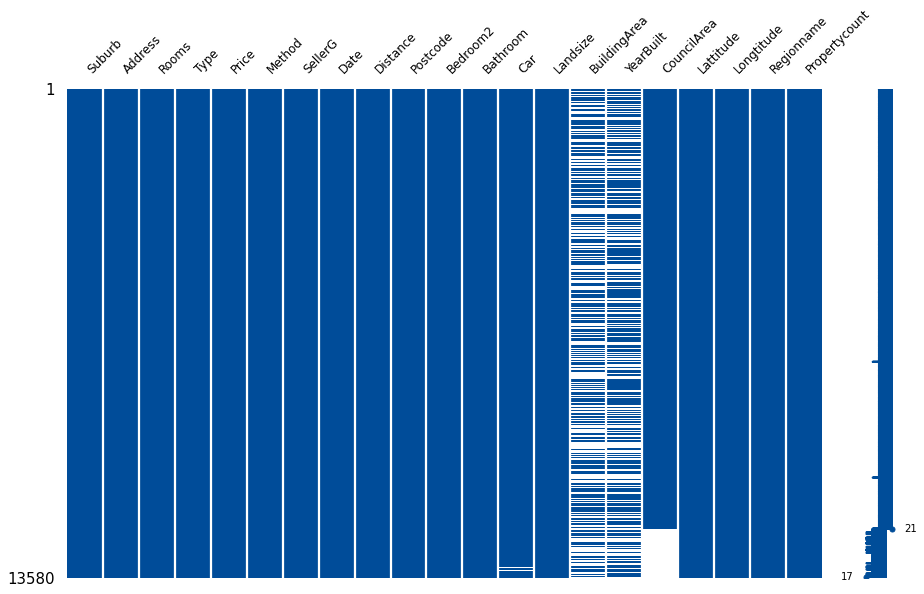

In [44]:
print(melb_df_full.columns)
msno.matrix(melb_df_full,figsize=(15, 9), fontsize=12, color=[0,0.3,0.6])

##Las columnas que seleccionamos son Rooms, Car, Type, Price, Postcode, Landsize, BuildingArea, YearBuilt, Suburb, Lattitude y Longtitude.

##Consideramos que las principales variables que permiten determinar el valor de una propiedad son la ubicación (Postcode, Suburb, Lattitude, Longtitude), comodidades (Type, Rooms, Car) y también la superficie (Landsize, BuildingArea).

##El resto de variables no las hemos considerado ya que no aportan información relevante como es el caso de Regionname o Propertycount.


In [45]:
pandas.options.display.float_format = '{:,.2f}'.format
interesting_cols = [
  'Rooms', 'Car', 'Type', 'Price', 
  'Postcode', 'Landsize','BuildingArea', 'YearBuilt',
  'Suburb', 'Lattitude', 'Longtitude'
]
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv', usecols=interesting_cols)
melb_df

,Suburb,Rooms,Type,Price,Postcode,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
0,Abbotsford,2,h,"1,480,000.00","3,067.00",1.00,202.00,NaN,NaN,-37.80,145.00
1,Abbotsford,2,h,"1,035,000.00","3,067.00",0.00,156.00,79.00,"1,900.00",-37.81,144.99
2,Abbotsford,3,h,"1,465,000.00","3,067.00",0.00,134.00,150.00,"1,900.00",-37.81,144.99
3,Abbotsford,3,h,"850,000.00","3,067.00",1.00,94.00,NaN,NaN,-37.80,145.00
4,Abbotsford,4,h,"1,600,000.00","3,067.00",2.00,120.00,142.00,"2,014.00",-37.81,144.99
...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,"1,245,000.00","3,150.00",2.00,652.00,NaN,"1,981.00",-37.91,145.17
13576,Williamstown,3,h,"1,031,000.00","3,016.00",2.00,333.00,133.00,"1,995.00",-37.86,144.88
13577,Williamstown,3,h,"1,170,000.00","3,016.00",4.00,436.00,NaN,"1,997.00",-37.85,144.89
13578,Williamstown,4,h,"2,500,000.00","3,016.00",5.00,866.00,157.00,"1,920.00",-37.86,144.89


Para eliminar los valores extremos analizamos la distribución de las variables principales y calculamos los quantiles para determinar el corte.

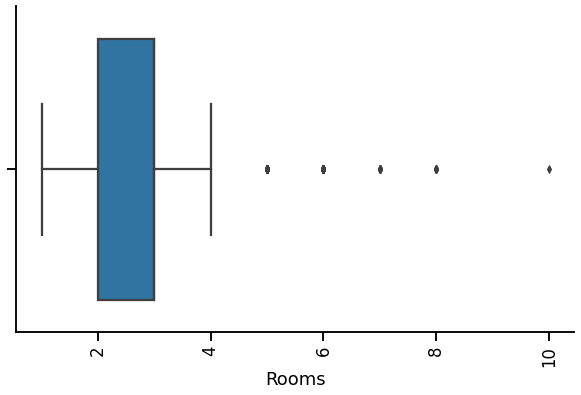

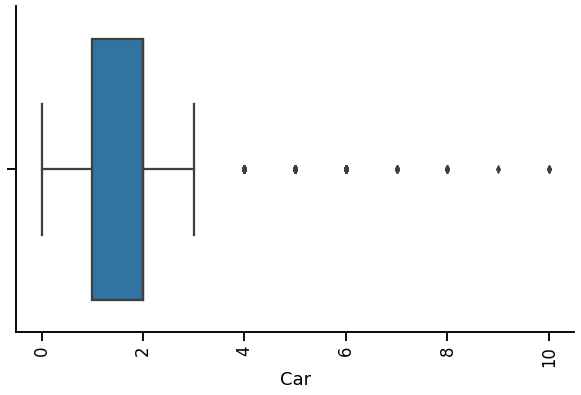

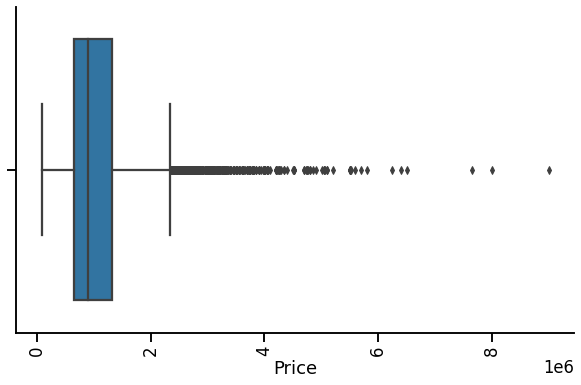

In [46]:
for col in ['Rooms', 'Car', 'Price']:
    plt.figure(figsize=(10,6))
    seaborn.boxplot(data=melb_df, x=col)
    plt.xticks(rotation=90)
    seaborn.despine()

In [47]:
for col in ['Rooms', 'Car', 'Price']:
    print(melb_df[col].quantile([.01, .02, .05, .1, .95, .98, .99]))

0.01   1.00
0.02   1.00
0.05   1.00
0.10   2.00
0.95   5.00
0.98   5.00
0.99   5.00
Name: Rooms, dtype: float64
0.01   0.00
0.02   0.00
0.05   0.00
0.10   1.00
0.95   3.00
0.98   4.00
0.99   5.00
Name: Car, dtype: float64
0.01     300,000.00
0.02     331,000.00
0.05     405,000.00
0.10     480,000.00
0.95   2,290,050.00
0.98   2,865,360.00
0.99   3,338,150.00
Name: Price, dtype: float64


,Suburb,Rooms,Type,Price,Postcode,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
0,Abbotsford,2,h,"1,480,000.00","3,067.00",1.00,202.00,NaN,NaN,-37.80,145.00
1,Abbotsford,2,h,"1,035,000.00","3,067.00",0.00,156.00,79.00,"1,900.00",-37.81,144.99
2,Abbotsford,3,h,"1,465,000.00","3,067.00",0.00,134.00,150.00,"1,900.00",-37.81,144.99
3,Abbotsford,3,h,"850,000.00","3,067.00",1.00,94.00,NaN,NaN,-37.80,145.00
4,Abbotsford,4,h,"1,600,000.00","3,067.00",2.00,120.00,142.00,"2,014.00",-37.81,144.99
...,...,...,...,...,...,...,...,...,...,...,...
13573,Werribee,4,h,"635,000.00","3,030.00",1.00,662.00,172.00,"1,980.00",-37.89,144.65
13574,Westmeadows,3,h,"582,000.00","3,049.00",2.00,256.00,NaN,NaN,-37.68,144.89
13575,Wheelers Hill,4,h,"1,245,000.00","3,150.00",2.00,652.00,NaN,"1,981.00",-37.91,145.17
13576,Williamstown,3,h,"1,031,000.00","3,016.00",2.00,333.00,133.00,"1,995.00",-37.86,144.88


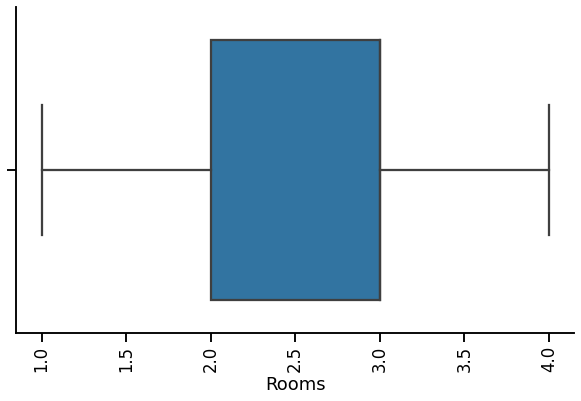

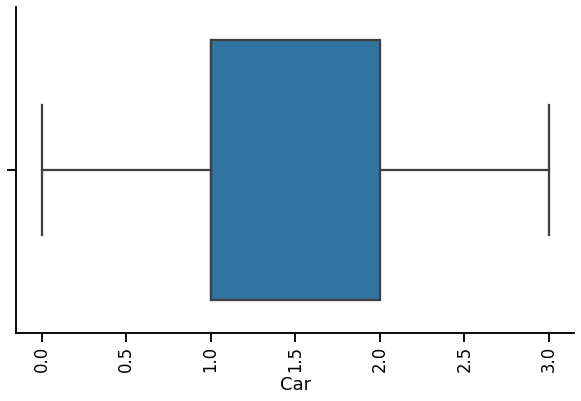

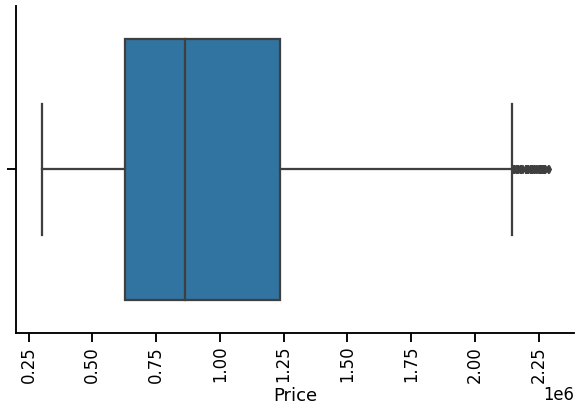

In [48]:
melb_df_clean = melb_df[(melb_df['Rooms'] < 5)]
melb_df_clean = melb_df_clean[(melb_df_clean['Car'] < 4)]
melb_df_clean = melb_df_clean[(melb_df_clean['Price'] > 300000)]
melb_df_clean = melb_df_clean[(melb_df_clean['Price'] < 2290050)]
for col in ['Rooms', 'Car', 'Price']:
    plt.figure(figsize=(10,6))
    seaborn.boxplot(data=melb_df_clean, x=col)
    plt.xticks(rotation=90)
    seaborn.despine()
melb_df_clean

#2.
#2.1 Agregamos información obtenida del conjunto de datos de airbnb. Para ello realizamos un breve análisis previo.

In [49]:
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce') #
airbnb_df.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (35,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighborhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 

##Primero seleccionamos solo las variables que contienen el precio de las propiedades y verificamos la cantidad de NAN.

zipcode            146
price                0
weekly_price     20371
monthly_price    21004
dtype: int64


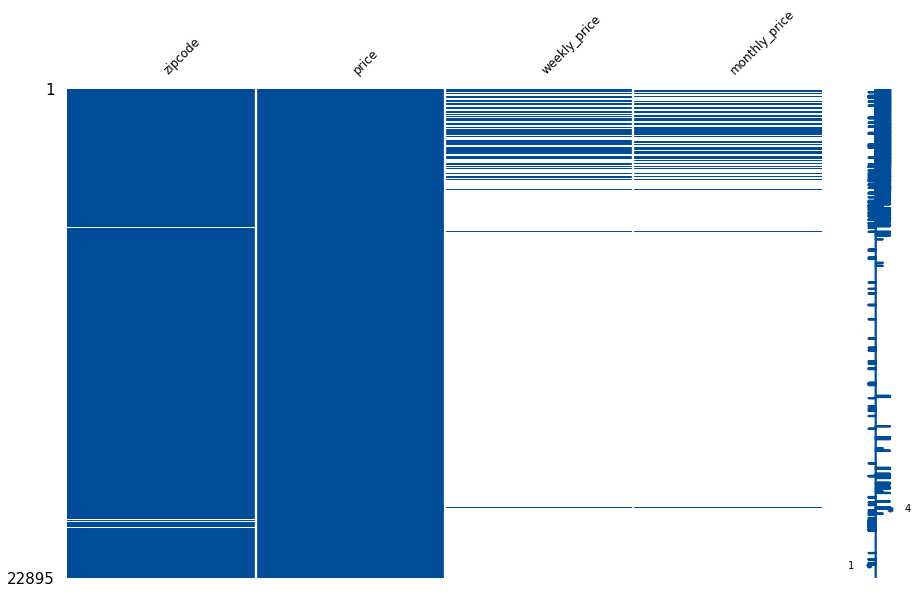

In [50]:
airbnb_interesting_cols = [
  'zipcode',
  'price', 'weekly_price', 'monthly_price'
]

print(airbnb_df[airbnb_interesting_cols].isna().sum())
msno.matrix(airbnb_df[airbnb_interesting_cols],figsize=(15, 9), fontsize=12, color=[0,0.3,0.6])

##Debido al gran número de NAN en algunas de ellas decidimos solo quedarnos con la variable "price" y eliminar los outliers.

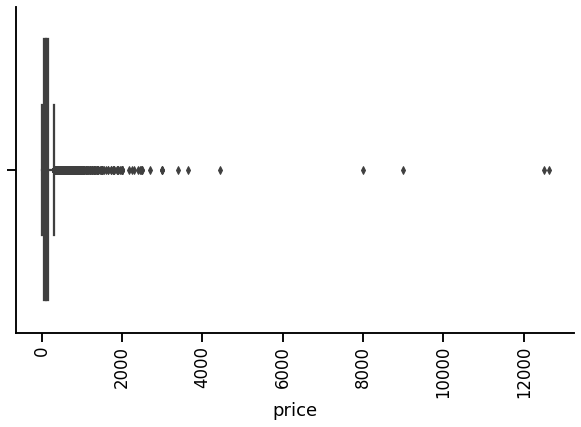

In [51]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=airbnb_df, x='price')
plt.xticks(rotation=90)
seaborn.despine()

In [52]:
airbnb_df['price'].quantile([.01, .02, .05, .1, .95, .98, .99])

0.01    25.00
0.02    30.00
0.05    37.00
0.10    46.00
0.95   352.00
0.98   595.00
0.99   800.00
Name: price, dtype: float64

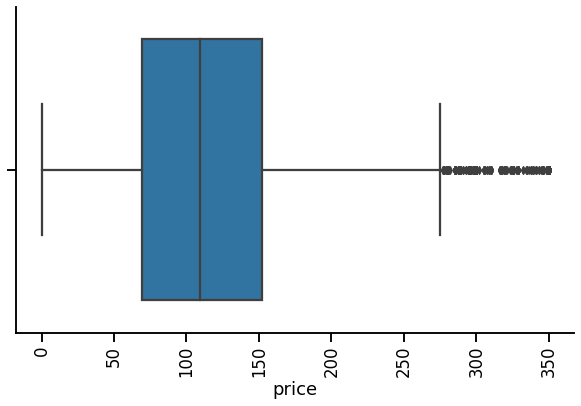

In [53]:
airbnb_df_clean = airbnb_df[(airbnb_df['price'] < 352)]
plt.figure(figsize=(10,6))
seaborn.boxplot(data=airbnb_df_clean, x='price')
plt.xticks(rotation=90)
seaborn.despine()

## Finalmente agregamos dos transformaciones de la variable "price", la media y el máximo.

In [54]:
airbnb_df_final = airbnb_df_clean[airbnb_interesting_cols].groupby('zipcode').agg(airbnb_record_count=('price', 'count'),airbnb_price_mean=('price', 'mean'),airbnb_price_max=('price', 'max')).reset_index()
airbnb_df_final

,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_price_max
0,"2,010.00",1,40.00,40
1,"2,134.00",1,50.00,50
2,"2,582.00",1,104.00,104
3,"3,000.00",3244,132.17,350
4,"3,001.00",2,132.50,145
...,...,...,...,...
242,"7,367.00",1,230.00,230
243,"8,938.00",1,296.00,296
244,"9,004.00",1,226.00,226
245,"9,540.00",1,245.00,245


#2.2 Antes de unir nuestros conjuntos de datos vamos a eliminar aquellos zipcodes que tengan menos de 10 registros para que la información agregada sea relevante.

In [55]:
airbnb_df_final = airbnb_df_final[(airbnb_df_final['airbnb_record_count'] >= 10)]
airbnb_df_final

,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_price_max
3,"3,000.00",3244,132.17,350
5,"3,002.00",175,137.76,345
6,"3,003.00",261,123.70,350
7,"3,004.00",697,137.02,350
8,"3,006.00",1162,146.31,350
...,...,...,...,...
218,"3,805.00",27,137.00,325
219,"3,806.00",31,88.13,251
222,"3,809.00",14,76.21,190
223,"3,810.00",22,94.95,180


##Finalmente realizamos el merge de nuestros conjuntos de datos.

In [56]:
melb_df_final = melb_df_clean.merge(airbnb_df_final, how='left', left_on='Postcode', right_on='zipcode')
melb_df_final

,Suburb,Rooms,Type,Price,Postcode,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_price_max
0,Abbotsford,2,h,"1,480,000.00","3,067.00",1.00,202.00,NaN,NaN,-37.80,145.00,"3,067.00",247.00,111.30,336.00
1,Abbotsford,2,h,"1,035,000.00","3,067.00",0.00,156.00,79.00,"1,900.00",-37.81,144.99,"3,067.00",247.00,111.30,336.00
2,Abbotsford,3,h,"1,465,000.00","3,067.00",0.00,134.00,150.00,"1,900.00",-37.81,144.99,"3,067.00",247.00,111.30,336.00
3,Abbotsford,3,h,"850,000.00","3,067.00",1.00,94.00,NaN,NaN,-37.80,145.00,"3,067.00",247.00,111.30,336.00
4,Abbotsford,4,h,"1,600,000.00","3,067.00",2.00,120.00,142.00,"2,014.00",-37.81,144.99,"3,067.00",247.00,111.30,336.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11703,Werribee,4,h,"635,000.00","3,030.00",1.00,662.00,172.00,"1,980.00",-37.89,144.65,"3,030.00",246.00,99.63,350.00
11704,Westmeadows,3,h,"582,000.00","3,049.00",2.00,256.00,NaN,NaN,-37.68,144.89,"3,049.00",21.00,92.29,281.00
11705,Wheelers Hill,4,h,"1,245,000.00","3,150.00",2.00,652.00,NaN,"1,981.00",-37.91,145.17,"3,150.00",183.00,111.86,300.00
11706,Williamstown,3,h,"1,031,000.00","3,016.00",2.00,333.00,133.00,"1,995.00",-37.86,144.88,"3,016.00",70.00,168.80,350.00


#2.3 
##Las variables que consideramos como posibles para realizar la combinación de los conjuntos de datos son "Suburb", "Lattitude" y "Longtitude". 

In [57]:
print("Cantidad de suburbs direfentes en el conjunto de datos airbnb: ", len(airbnb_df.suburb.unique()))
print("Cantidad de suburbs direfentes en el conjunto de datos kaggel: ",len(melb_df_full.Suburb.unique()))
print("Cantidad de suburbs presentes en ambos conjunts de datos: ",len(list(set(airbnb_df.suburb.unique()) & set(melb_df_full.Suburb.unique()))))
print(len(list(set(airbnb_df.suburb.unique()) & set(melb_df_full.Suburb.unique()))) / len(melb_df_full.Suburb.unique()))


Cantidad de suburbs direfentes en el conjunto de datos airbnb:  543
Cantidad de suburbs direfentes en el conjunto de datos kaggel:  314
Cantidad de suburbs presentes en ambos conjunts de datos:  296
0.9426751592356688


##Como podemos comprobar el 94% de los suburbs presentes en el conjunto de datos de kaggel también están presentes también en el conjunto de datos de airbnb.

##Respecto a las variables "Latitude" y "Longitude" pueden ser utilizadas para crear variables cualitativas que determinen si una propiedad se encuentra de un área delimitada y así agruparlas y agregar la información necesaria a ese grupo. 

# Ejercicio 3:

##Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [58]:
from google.colab import files
melb_df_final.to_csv("melb_df_final.csv", index=None)

files.download('melb_df_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>